#CafChem tools for building an RNN model, or fine-tuning an RNN model to produce molecules based on a user-provided dataset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/RNN_CafChem.ipynb)

## This notebook allows you to:
- Read in a CSV file with SMILES strings and tokenize it.
- Train or finetune an RNN on this dataset.
- Save the RNN for future use.
- upload a saved RNN.
- test the RNN by generating sample molecules
- Run large-scale inference to generate up to 5K molecules.

## Requirements:
- This notebook will install deepchem
- It will pull the CafChem tools from Github.
- It will install all needed libraries.


## Set-up

This block:

- Loads all needed modules/libraries
    
- pulls CafChem from github

In [1]:
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 63.7 MB/s eta 0:00:00


In [1]:
!git clone https://github.com/MauricioCafiero/CafChem.git

Cloning into 'CafChem'...
remote: Enumerating objects: 515, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 515 (delta 84), reused 45 (delta 45), pack-reused 423 (from 1)
Receiving objects: 100% (515/515), 39.57 MiB | 14.11 MiB/s, done.
Resolving deltas: 100% (302/302), done.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import transformers
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem, Draw
import CafChem.CafChemRNN as ccrnn

print("All libraries loaded!")

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


All libraries loaded!


## Tokenize
- Create the tokenizer (right now the vocabulary is limited to 100 tokens). You can test the compapibility of your dataset with the vocabulary below.
- Create the input and target arrays for training.

In [ ]:
fx, fy, VOCAB_SIZE, tokenizer, max_length = ccrnn.make_datasets("/content/ZN305K_smiles.csv", "SMILES")

166 6
Vocabulary size for this dataset:  100
Number of features and datapoints, targets:  (304973, 165) (304973, 165)
featurization done with:  SMILES Tokenizer


In [ ]:
print(f"Vocabulary size: {VOCAB_SIZE}")
print(f"Max length: {max_length}")

Vocabulary size: 100
Max length: 166


## Training the model

- This block defines the sequential model and runs the optimization.

- can load previous weights

In [ ]:
rnn = ccrnn.make_rnn(2, 256, max_length-1, VOCAB_SIZE)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 165, 24)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 165, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 165, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 165, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,428 (2.44 MB)

 Trainable params: 639,428 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 512
optimizer = tf.keras.optimizers.Nadam()
rnn.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])

rnn.fit(fx,fy,epochs = 50, batch_size = batch_size)

Epoch 1/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.8544 - loss: 0.6000
Epoch 2/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9275 - loss: 0.2240
Epoch 3/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9342 - loss: 0.1997
Epoch 4/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9374 - loss: 0.1880
Epoch 5/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9388 - loss: 0.1830
Epoch 6/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9407 - loss: 0.1765
Epoch 7/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9419 - loss: 0.1725
Epoch 8/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9424 - loss: 0.1707
Epoch 9/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9435 - loss: 0.1668
Epoch 10/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9442 - loss: 0.1643
Epoch 11/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9448 - loss: 0.1625
Epoch 12/50
596/596 ━━━━━━━━━━

## saving
- saves both the model weights and the layer names (in a txt file). These are needed for loading later.

In [ ]:
rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 165, 24)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 165, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 165, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 165, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,918,287 (7.32 MB)

 Trainable params: 639,428 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,278,859 (4.88 MB)

In [ ]:
ccrnn.save_RNN(rnn, "RNN_ZN305_50epochs")

New layer names:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original            │ (None, 165, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original (GRU)           │ (None, 165, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original (GRU)           │ (None, 165, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5_original (Dense)        │ (None, 165, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,918,287 (7.32 MB)

 Trainable params: 639,428 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,278,859 (4.88 MB)

model saved with name: RNN_305K_50epochs.
layer names saved in file: layer_store_RNN_305K_50epochs.


## Set up Xfer learning
- first, upload a training set and test the vocabulary to see if your dataset is compatible with the Foundation model used for fine-tuning. It will check if you dataset has any token not included in the foundation model, and check to see if the context window for your dataset is within the context window for the foundation model.
- if it is compatible, tokenize your dataset.
- then create a new model that has 2 layers pre-loaded from the foundation model, with a user-specified number of new blocks for fine-tuning. By default the old blocks are frozen for training, but you can toggle this.
- (optionally unfreeze the old blocks/layers)
- finally train the model. About 50 epochs of training minumum are usually required for fine-tuning. Model should be trained first with the foundation layers frozen, and then again with them unfrozen.
- The foundation model is a 2 GRU layer model with 256 neurons per layer, trained on 305K SMILES from the ZN database. Of those, at least 55K are drug-like.

In [5]:
novel_tokens = ccrnn.test_vocab("/content/maob_4015_ic50_trimmed.csv", "SMILES")

86 10
New vocabulary size:  39
Vocabulary size for standard dataset:  100
This dataset is compatible with the Foundation model vocabulary
This dataset's context window is compatible with the Foundation model


In [4]:
ccrnn.trim_vocab("/content/maob_4015_ic50.csv", novel_tokens)

Removed 202 entries from the list!
New CSV file written!


In [6]:
df = pd.read_csv("/content/maob_4015_ic50_trimmed.csv")
df.shape

(3813, 1)

In [7]:
fx, fy, VOCAB_SIZE, tokenizer, max_length = ccrnn.make_datasets("/content/maob_4015_ic50_trimmed.csv", "SMILES")

86 10
Vocabulary size for this dataset:  100
Number of features and datapoints, targets:  (3813, 85) (3813, 85)
featurization done with:  SMILES Tokenizer


In [8]:
rnn_2x_2 = ccrnn.make_finetune_rnn(2, 256, freeze_old_layers=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 166, 24)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 166, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 166, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,428,932 (5.45 MB)

 Trainable params: 1,428,932 (5.45 MB)

 Non-trainable params: 0 (0.00 B)

Reading in layers:
embedding_7_original
gru_11_original
gru_12_original
dense_5_original
embedding_7_original has been named!
gru_11_original has been named!
gru_12_original has been named!
GRU_layer_X_1 has been named!
GRU_layer_X_2 has been named!
setting layer embedding_7_original untrainable.
setting layer gru_11_original untrainable.
setting layer gru_12_original untrainable.
setting layer GRU_layer_X_1 trainable.
setting layer GRU_layer_X_2 trainable.
setting layer dense_X trainable.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:629: UserWarning: A total of 2 objects could not be loaded. Example error message for object <GRUCell name=gru_cell, built=True>:

Layer 'gru_cell' expected 3 variables, but received 0 variables during loading. Expected: ['kernel', 'recurrent_kernel', 'bias']

List of objects that could not be loaded:
[<GRUCell name=gru_cell, built=True>, <GRUCell name=gru_cell, built=True>]
  warnings.warn(msg)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original            │ (None, 166, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original (GRU)           │ (None, 166, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original (GRU)           │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_1 (GRU)             │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_2 (GRU)             │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_X (Dense)                 │ (None, 166, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,428,932 (5.45 MB)

 Trainable params: 815,204 (3.11 MB)

 Non-trainable params: 613,728 (2.34 MB)

In [10]:
rnn_2x_2 = ccrnn.unfreeze_rnn(rnn_2x_2)

setting layer embedding_7_original trainable.
setting layer gru_11_original trainable.
setting layer gru_12_original trainable.
setting layer GRU_layer_X_1 trainable.
setting layer GRU_layer_X_2 trainable.
setting layer dense_X trainable.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original            │ (None, 166, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original (GRU)           │ (None, 166, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original (GRU)           │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_1 (GRU)             │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_2 (GRU)             │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_X (Dense)                 │ (None, 166, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,059,343 (11.67 MB)

 Trainable params: 1,428,932 (5.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,630,411 (6.22 MB)

In [11]:
batch_size = 512
optimizer = tf.keras.optimizers.Nadam()
rnn_2x_2.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])

rnn_2x_2.fit(fx,fy,epochs = 50, batch_size = batch_size)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8838 - loss: 0.4082
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9262 - loss: 0.2130
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9352 - loss: 0.1835
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9401 - loss: 0.1720
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9421 - loss: 0.1654
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9431 - loss: 0.1614
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9448 - loss: 0.1563
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9455 - loss: 0.1540
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9464 - loss: 0.1500
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9467 - loss: 0.1482
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9469 - loss: 0.1478
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9484 - loss: 0.1423
E

In [ ]:
ccrnn.save_rnn(rnn_2x_2, "RNN_statin_50p50epochs")

New layer names:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original_original   │ (None, 166, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original_original (GRU)  │ (None, 166, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original_original (GRU)  │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_1_original (GRU)    │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_2_original (GRU)    │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_X_original (Dense)        │ (None, 166, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,286,799 (16.35 MB)

 Trainable params: 1,428,932 (5.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,857,867 (10.90 MB)

model saved with name: RNN_statin_50p50epochs.
layer names saved in file: layer_store_RNN_statin_50p50epochs.


## Standard molecule prediction

This block

- Accepts a model and generates a sample of up to 5 molecules as a quick test for the model.
- you can load just the foundation model to use, or
- use any other model.


In [ ]:
rnn_found = ccrnn.load_foundation()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 166, 24)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_33 (GRU)                    │ (None, 166, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_34 (GRU)                    │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 166, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,428 (2.44 MB)

 Trainable params: 639,428 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

embedding_7_original
gru_11_original
gru_12_original
dense_5_original
embedding_7_original has been named!
gru_11_original has been named!
gru_12_original has been named!
dense_5_original has been named!
Foundation model loaded.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original            │ (None, 166, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original (GRU)           │ (None, 166, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original (GRU)           │ (None, 166, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5_original (Dense)        │ (None, 166, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,428 (2.44 MB)

 Trainable params: 639,428 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
pic = ccrnn.test_gen(rnn_2x_2,tokenizer,1.0,VOCAB_SIZE, 42)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
using variable temp generation with 1.0.
(5, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
using variable temp generation with 1.0.
(5, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
using variable temp generation with 1.0.
(5, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
using variable temp generation with 1.0.
(5, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
using variable temp generation with 1.0.
(5, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
using variable temp generation with 1.0.
(5, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
using variable temp generation with 1.0.
(5, 10)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
using variable temp generation with 1.0.
(5, 11)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
using variable temp generation with 1.0.
(5, 12)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
using variable temp generation with 1.0.
(5, 13)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
using variable temp generation with 1.0.
(5, 14)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
using var

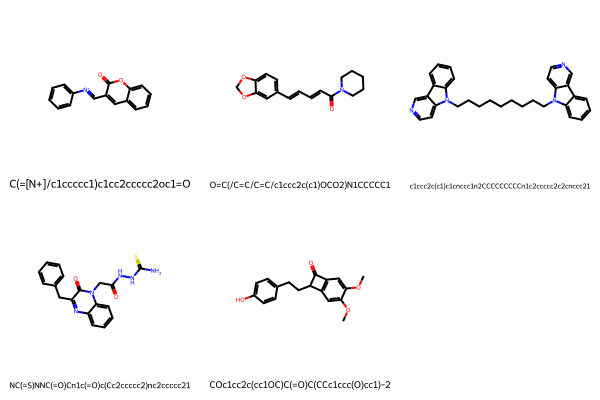

In [13]:
pic

## Inference
- Load any model: just provide the string of the model's filename, the total number of blocks, and the context window and vocabulary size (from a tokenization above).
- Create up to 5K prompts with a length up to the context window size. Prompt lengths less than 6 tokens are recommended.

In [ ]:
loaded_model = ccrnn.load_rnn("RNN_statin_50p50epochs", 4, 256, max_length, VOCAB_SIZE)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 118, 24)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_35 (GRU)                    │ (None, 118, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_36 (GRU)                    │ (None, 118, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_37 (GRU)                    │ (None, 118, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_38 (GRU)                    │ (None, 118, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 118, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,428,932 (5.45 MB)

 Trainable params: 1,428,932 (5.45 MB)

 Non-trainable params: 0 (0.00 B)

embedding_7_original_original
gru_11_original_original
gru_12_original_original
GRU_layer_X_1_original
GRU_layer_X_2_original
dense_X_original
embedding_7_original_original has been named!
gru_11_original_original has been named!
gru_12_original_original has been named!
GRU_layer_X_1_original has been named!
GRU_layer_X_2_original has been named!
dense_X_original has been named!
model loaded with name: RNN_statin_50p50epochs.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original_original   │ (None, 118, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original_original (GRU)  │ (None, 118, 256)       │       216,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original_original (GRU)  │ (None, 118, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_1_original (GRU)    │ (None, 118, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU_layer_X_2_original (GRU)    │ (None, 118, 256)       │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_X_original (Dense)        │ (None, 118, 100)       │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,428,932 (5.45 MB)

 Trainable params: 1,428,932 (5.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loaded_model = ccrnn.load_foundation()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 166, 24)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_29 (GRU)                    │ (None, 166, 128)       │        59,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_30 (GRU)                    │ (None, 166, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 166, 100)       │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,508 (677.77 KB)

 Trainable params: 173,508 (677.77 KB)

 Non-trainable params: 0 (0.00 B)

embedding_7_original
gru_11_original
gru_12_original
dense_5_original
embedding_7_original has been named!
gru_11_original has been named!
gru_12_original has been named!
dense_5_original has been named!
Foundation model loaded.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:629: UserWarning: A total of 3 objects could not be loaded. Example error message for object <GRUCell name=gru_cell, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(24, 384), Received: value.shape=(24, 768). Target variable: <Variable path=sequential_5/gru_29/gru_cell/kernel, shape=(24, 384), dtype=float32, value=[[-0.0625977  -0.12030499 -0.09520721 ... -0.0986594   0.00102564
  -0.09662508]
 [-0.08975576 -0.04633749 -0.11985428 ... -0.08378637 -0.06871365
  -0.04285885]
 [-0.06887116 -0.06010761  0.02804315 ... -0.00645648  0.08822536
  -0.0201776 ]
 ...
 [ 0.01968713  0.02228865  0.0906955  ...  0.03443551  0.06274845
  -0.10985322]
 [ 0.04079869  0.01862456 -0.0124233  ... -0.0360387  -0.0553847
   0.04263455]
 [-0.08998113 -0.06146806 -0.04226212 ... -0.04443059 -0.11977081
  -0.09538925]]>

List of objects that could not b

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7_original            │ (None, 166, 24)        │         2,400 │
│ (Embedding)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11_original (GRU)           │ (None, 166, 128)       │        59,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12_original (GRU)           │ (None, 166, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5_original (Dense)        │ (None, 166, 100)       │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,508 (677.77 KB)

 Trainable params: 173,508 (677.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
prompts = ccrnn.make_prompts(100,2)

In [ ]:
pic, novel_smiles = ccrnn.gen_mols(prompts, True, loaded_model, tokenizer, 1.5, VOCAB_SIZE)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
using zero temp generation with 0.0005030251956997171.
(100, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
using zero temp generation with 0.0013665767916009681.
(100, 4)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
using zero temp generation with 0.0037089347349521613.
(100, 5)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
using zero temp generation with 0.010039276386427282.
(100, 6)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
using variable temp generation with 0.026979314943137336.
(100, 7)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
using variable temp generation with 0.07113880976635018.
(100, 8)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
using variable temp generation with 0.1788043830331763.
(100, 9)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
using variable temp generation with 0.40341213205499266.
(100, 10)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
using variable temp generation with 0.75.
(100, 11)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
using variable temp generation with 1.09658786

[14:14:54] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 26 28 31 32 33 34 35 36 37
[14:14:54] Explicit valence for atom # 33 N, 5, is greater than permitted
[14:14:54] SMILES Parse Error: extra close parentheses while parsing: CC(C)c1c(C(=C)C)C(C)(C)S2(=O)=O)CC(C)(C)-c2c1n[PH+](n(c1C)c1ccccc1s)n1c(C)cccc12
[14:14:54] SMILES Parse Error: check for mistakes around position 32:
[14:14:54] =C)C)C(C)(C)S2(=O)=O)CC(C)(C)-c2c1n[PH+](
[14:14:54] ~~~~~~~~~~~~~~~~~~~~^
[14:14:54] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1c(C(=C)C)C(C)(C)S2(=O)=O)CC(C)(C)-c2c1n[PH+](n(c1C)c1ccccc1s)n1c(C)cccc12' for input: 'CC(C)c1c(C(=C)C)C(C)(C)S2(=O)=O)CC(C)(C)-c2c1n[PH+](n(c1C)c1ccccc1s)n1c(C)cccc12'
[14:14:54] Explicit valence for atom # 23 C, 4, is greater than permitted
[14:14:54] SMILES Parse Error: unclosed ring for input: 'CC(C)c1nc(Nc2nsnn2)c(nc1-c1ccc[nH]1)-c3ccc(F)cc12'
[14:14:54] SMILES Parse Error: ring closure 1 duplicates bond between atom 20 and atom 21 for input: 'CC(C)c1c(OC[C@@H](O

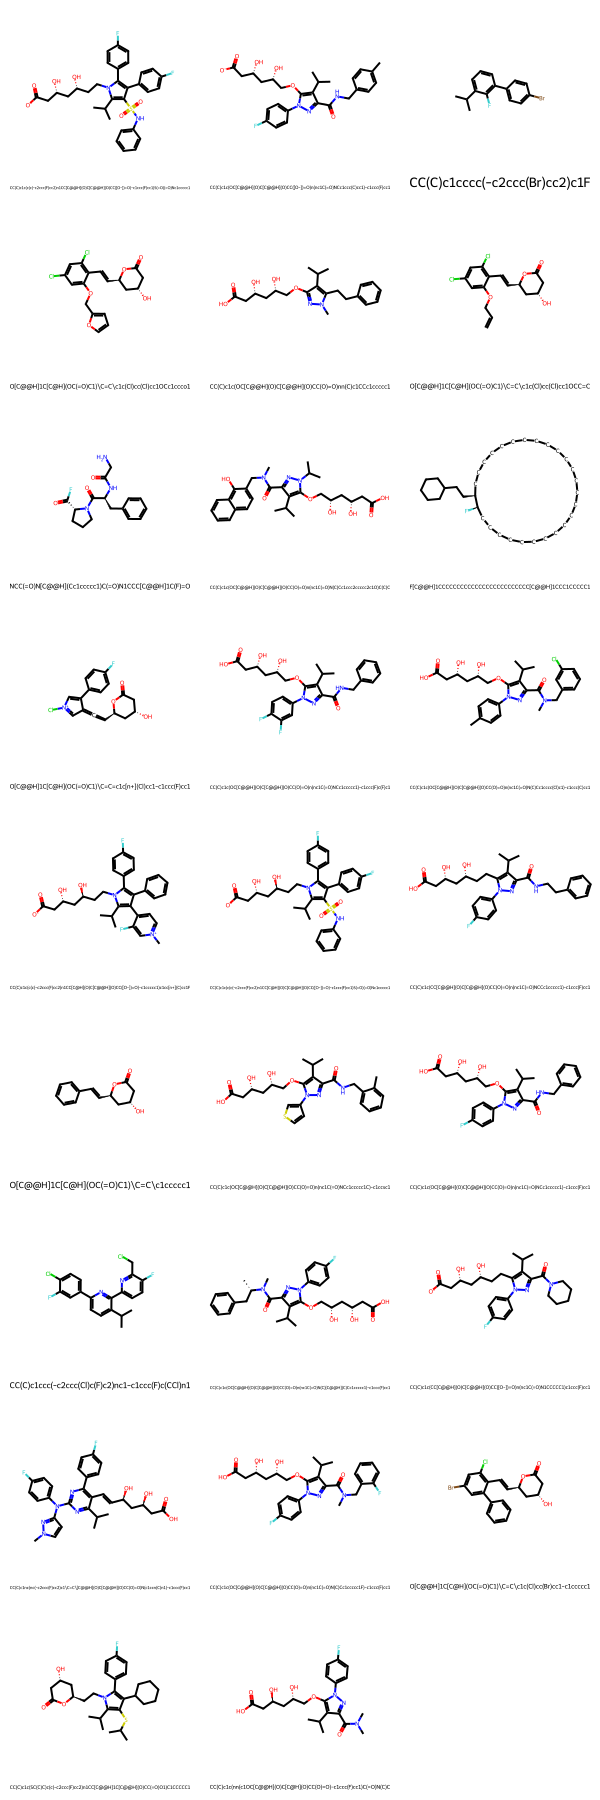

In [ ]:
pic

## Create specific vocab list

- First block must be run before using this block. Then swap out the old vocab file for the new one and rerun
first block.
- reads in original vocab list
- uses the fl2set from the first block: this is a set with all unique tokens used in this model
- if a token is used, it is added to the new vocab list
- Note: [unused] must be added after [PAD] if it is not included

In [ ]:
#routine to create a smaller vocab_file based on the dataset using fl2set
oldvocab = open("vocab.txt","r")
oldvocab_lines = oldvocab.readlines()
oldvocab.close()

newvocab = open("vocab_350K.txt","w",newline="\n")

for i in range(len(oldvocab_lines)):
    if i in fl2set:
        print(oldvocab_lines[i])
        newvocab.write(oldvocab_lines[i])

newvocab.close()

[PAD]

[CLS]

[SEP]

c

C

(

)

O

1

2

=

N

n

3

F

Cl

-

4

[C@H]

S

[C@@H]

[O-]

Br

#

/

[nH]

[N+]

s

5

o

P

[Si]

I

B

[C@]

[C@@]

6

\

[N-]

[c-]

[O+]

7

[n+]

[Sn]

[CH]

[C-]

[B-]

[P+]

[C]

8

[nH+]

[NH3+]

[S@]

[S@@]

[S-]

[PH]

[NH2+]

[S+]

[NH+]

9

[cH-]

[O]

[SH]

[PH+]

[C+]

[SnH]

%10

[CH2-]

[n-]

[NH-]

[PH2]

%11

[N]

[P@]

[s+]

[CH-]

[CH+]

%12

[P@@]

[o+]

%13

[S@+]

[S@@+]

[SH+]

[OH+]

%14

%15

%16

[N@@+]

[N@+]

[125I]

%17

%18

%19

%20

%21

[P@@H]

[131I]

[P@H]



In [ ]:
rnd = random.